# Summary
* This notbook helps in analyzing the number of complains with different factors like arrival of oil vessels, the type and number of oil vessels arriving, average wind speed, average temperature. 
* Convenience functions are build to get the analysis based on month, year or area (South Portland/Portland)
*   The basic idea behind creating convenience functions is that the user can give input for specific month and year to look at the analysis only for those particular months and have a closer look at the pattern of complaints
*   Similarly, convenience functions are created to look at the number of oil vessels arriving with type of oil, average temperature and average wind speed. These factors can then be compared with the number of complaints to find any relation between them monthly

# Instructions


1.   Go to Runtime in the options above and click on Run all. All visualizations will have displayed after this.

2.   Scrool down to text cell which says convenience functions to look at the functions which can be manipuated by the user. The instructions about each function are defined in their docstring which can be referred before passing parameters in that function.

3.  Below the text cell which reads Running Convenience Fucntions, the user can pass different months and year in these funtions to get the analysis. If the data is not available for that month and year, a message would be displayed

5. After getting the desired graphs by using the functions, the user can right click on the visualizations to download these as images if required by simply copying them or saving them.

In [20]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import StrMethodFormatter

In [22]:
# Loading the datasets from github repo

df_vessels=pd.read_csv(r'https://raw.githubusercontent.com/ds5110/stinky/master/vessels_data/vessels_intermediary_files/df_vessels.csv')
df_stinky = pd.read_csv(r'https://raw.githubusercontent.com/ds5110/stinky/master/smell_data/smell_intermediary_files/df_stinky.csv')
df_weather = pd.read_csv(r'https://raw.githubusercontent.com/ds5110/stinky/master/weather_data/weather_intermediary_files/df_weather_master.csv')

In [23]:
def tidy_weather(df):
  """
  This function adds various columns to the weather dataset such as date, year, month and month name
  Input- df_weather
  Return- pre processed weather dataset
  """
  df_weather['date']=pd.to_datetime(df_weather['date'])
  df_weather['Year']=df_weather['date'].dt.year
  df_weather['Day']=df_weather['date'].dt.day
  df_weather['Month']=df_weather['date'].dt.month
  df_weather['Month_name'] = pd.to_datetime(df_weather['Month'], format='%m').dt.month_name().str.slice(stop=3)
  return df_weather

In [24]:
# The df_stinky dataset has both the SmellMyCity and SeeClickFix complaints dataset merged and looks like this
df_stinky.head(5)

,Id,Report Source,Category,Created at local,Closed at local,Status,Address,smell description,URL,Latitude,Longitude,Export tagged places,date,time,Day,Month,Year,Hour,Month_name,Date & time (hour rounded),geom,address,South Portland/Portland,epoch time,date & time,smell value,zipcode,symptoms,additional comments
0,7181157.0,iPhone,Odor,2020-01-07 08:26:00,2020-01-07 09:20:00,Archived,315 Spring Street,Petroleum smell coming from south portland,https://crm.seeclickfix.com/#/organizations/61...,43.647740,-70.269455,City Council District 2,2020-01-07,08:26:00,7,1,2020,8,Jan,2020-01-07 08:00:00,"43.64774,-70.26945450000001","315, Spring Street, West End, Portland, Cumber...",Portland,NaN,NaN,NaN,NaN,NaN,NaN
1,7181402.0,Android,Odor,2020-01-07 09:11:00,2020-01-07 09:20:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-07,09:11:00,7,1,2020,9,Jan,2020-01-07 09:00:00,"43.6494485,-70.2686259","22, Cushman Street, West End, Portland, Cumber...",Portland,NaN,NaN,NaN,NaN,NaN,NaN
2,7192000.0,Android,Odor,2020-01-09 07:14:00,2020-01-09 08:45:00,Archived,25 Cushman St,usual petroleum,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-09,07:14:00,9,1,2020,7,Jan,2020-01-09 07:00:00,"43.6494485,-70.2686259","22, Cushman Street, West End, Portland, Cumber...",Portland,NaN,NaN,NaN,NaN,NaN,NaN
3,7206428.0,Android,Odor,2020-01-13 08:22:00,2020-01-13 09:09:00,Archived,25 Cushman St,worst yet,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-13,08:22:00,13,1,2020,8,Jan,2020-01-13 08:00:00,"43.6494485,-70.2686259","22, Cushman Street, West End, Portland, Cumber...",Portland,NaN,NaN,NaN,NaN,NaN,NaN
4,7210067.0,Android,Odor,2020-01-14 08:24:00,2020-01-14 14:50:00,Archived,25 Cushman St,usual petroleum stink. Cushman and Reiche play...,https://crm.seeclickfix.com/#/organizations/61...,43.649448,-70.268626,City Council District 2,2020-01-14,08:24:00,14,1,2020,8,Jan,2020-01-14 08:00:00,"43.6494485,-70.2686259","22, Cushman Street, West End, Portland, Cumber...",Portland,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# The df_vessels dataset has all the information regarding the oil vessels relating to years 2020 and 2021 (merged together). It looks like this

df_vessels.head(5)

,ARRIVAL DATE,ARRIVAL TIME (if avail),TERMINAL,SHIP NAME,LAST PORT OF CALL (if avail),PRODUCT TYPE - OIL,"PRODUCT AMOUNT - OIL, Incoming (Multiply metric tons by 7.5 for approx bbls)","PRODUCT AMOUNT - OIL, Outgoing",RUNNING TOTAL (Oil),PRODUCT TYPE - NON-OIL,"PRODUCT AMOUNT - NON OIL, Incoming","PRODUCT AMOUNT - NON OIL, Outgoing",Running Total (Specify units) (Non-Oil),Year,Month,Day,Month_name
0,2020-01-02,NaN,Citgo,New England,St.John,23 - Unleaded Gasoline,80000.0,0.0,80000.0,NaN,0.0,0.0,0.0,2020,1,2,Jan
1,2020-01-02,NaN,Citgo,New England,St.John,28 - Premium Unleaded Gasoline,20000.0,0.0,100000.0,NaN,0.0,0.0,0.0,2020,1,2,Jan
2,2020-01-02,NaN,Citgo,New England,St.John,29 - Diesel (aka ULSD),22000.0,0.0,122000.0,NaN,0.0,0.0,0.0,2020,1,2,Jan
3,2020-01-02,NaN,Citgo,New England,St.John,23 - Unleaded Gasoline,60000.0,0.0,182000.0,NaN,0.0,0.0,0.0,2020,1,2,Jan
4,2020-01-02,NaN,Citgo,New England,St.John,23 - Unleaded Gasoline,20000.0,0.0,202000.0,NaN,0.0,0.0,0.0,2020,1,2,Jan


In [26]:
# The df_weather is the weather dataset which contains all the weather information from September 2020 to July 2021. It looks like this

df_weather=tidy_weather(df_weather)
df_weather.head(5)

,Date & time (hour rounded),date,time (hour rounded),Temp Avg,Temp Low,Temp High,Hum Avg,Hum Low,Hum High,Baro Avg,Baro Low,Baro High,Windspeed,Gust,Wind Direction,Cardinal Direction,Interval Precip,Leaf Wetness (Minutes),Solar Radiation Avg,Inside Temp Avg,Inside Temp Low,Inside Temp High,Heat Index,Wind Chill,Dew Point,UV Index,Station Voltage,Station Voltage 2,t1ia,t1il,t1ih,t2ia,t2il,t2ih,wetbulb,s2ia,smia,lvl1,lvl2,lvl3,Pod Name,Year,Day,Month,Month_name
0,2020-09-02 12:00:00,2020-09-02,12:00:00,75.00,75.0,75.0,60.0,60.0,60.0,29.97,29.97,29.98,0.0,0.0,157.0,South,0.0,NaN,NaN,66.51,65.0,69.0,75.00,75.0,60.2,NaN,6.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.7,NaN,NaN,NaN,NaN,NaN,SMRO3,2020,2,9,Sep
1,2020-09-02 13:00:00,2020-09-02,13:00:00,75.16,75.0,75.2,59.0,58.0,60.0,29.96,29.95,29.98,0.0,0.0,157.0,South,0.0,NaN,NaN,73.92,69.0,75.0,75.16,75.2,59.8,NaN,6.504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN,NaN,NaN,NaN,NaN,SMRO3,2020,2,9,Sep
2,2020-09-02 14:00:00,2020-09-02,14:00:00,75.41,75.2,75.5,58.0,58.0,58.0,29.94,29.93,29.95,0.0,0.0,135.0,South-East,0.0,NaN,NaN,74.98,74.0,75.0,75.41,75.4,59.6,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.3,NaN,NaN,NaN,NaN,NaN,SMRO3,2020,2,9,Sep
3,2020-09-02 15:00:00,2020-09-02,15:00:00,75.32,75.2,75.4,59.0,58.0,59.0,29.91,29.90,29.93,0.0,0.0,135.0,South-East,0.0,NaN,NaN,74.95,74.0,75.0,75.32,75.3,59.9,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.4,NaN,NaN,NaN,NaN,NaN,SMRO3,2020,2,9,Sep
4,2020-09-02 16:00:00,2020-09-02,16:00:00,75.47,75.2,75.7,59.0,59.0,59.0,29.89,29.88,29.90,0.0,0.0,135.0,South-East,0.0,NaN,NaN,74.90,74.0,75.0,75.47,75.5,60.1,NaN,6.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,NaN,NaN,NaN,NaN,NaN,SMRO3,2020,2,9,Sep


In [27]:
# Each function below helps in the analysis and the description of each function is mentioned in the function's docstring

# Function 1
def monthly_complaint(df):
  """
    The function is used to see the number of complaints monthly for the year 2019, 2020 and 2021
    Input- df_stinky
    Return- A barplot with number of complaints each month for 3 years (2019,2020,2021)
  """
  a=df.groupby(['Year','Month_name'])['date'].count().reset_index(name='Number of complaints monthly')
  fig, ax = plt.subplots()
  Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  f=sns.barplot(data=a,x='Month_name',y='Number of complaints monthly',palette='gnuplot',order=Months,hue='Year')
  f.set(xlabel='Months',ylabel='User complaints',title='Number of complaints each month for 3 years');
  fig.set_size_inches(8,8)
  plt.legend(loc='upper right')


# Function 2
def monthly_vessels_arriving(df):
  """
    The function shows the number of vessels arriving monthly for year 2020 and 2021
    Input- df_vessels
    Return- A barplot with number of vessels arriving monthly for 2 years (2020 and 2021)
  """
  b=df.groupby(['Year','Month_name'])['ARRIVAL DATE'].count().reset_index(name='Number of vessels arriving monthly')
  fig, ax = plt.subplots()
  Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  f=sns.barplot(data=b,x='Month_name',y='Number of vessels arriving monthly',palette='flare',order=Months,hue='Year')
  f.set(xlabel='Months',ylabel='Number of Ships',title='Number of ships arriving each month for year 2020 and 2021');
  fig.set_size_inches(8,8)

# Function 3
def product_type(df):
  """
    The function is used to see the number of oil vessels arriving each month and it also shows the type of oil coming in every month
    Input- df_vessels
    Return- 2 barplots, one for year 2020 and other for 2021, which shows the number of ships arriving and with which specific product type
  """
  h=df.groupby(['PRODUCT TYPE - OIL','Month_name','Year'])['ARRIVAL DATE'].count().reset_index(name='Number of vessels and product type')
  Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  p=sns.catplot(data=h,x='Month_name',y='Number of vessels and product type',hue='PRODUCT TYPE - OIL',order=Months,palette='gist_ncar',col='Year',kind='bar',height=6,col_wrap=1,aspect=2,legend=False)
  plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
  p.set(xlabel='Months',ylabel='Number of Ships');
  plt.legend(loc=1, bbox_to_anchor=(1, 1))



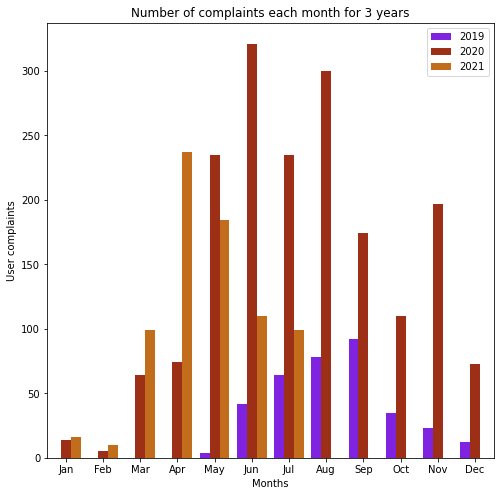

In [28]:
# Here we are calling the monthly_complaint function to look at the total number of complaints for year 2019, 2020, 2021
# The parameters in this function should not be changed

monthly_complaint(df_stinky)

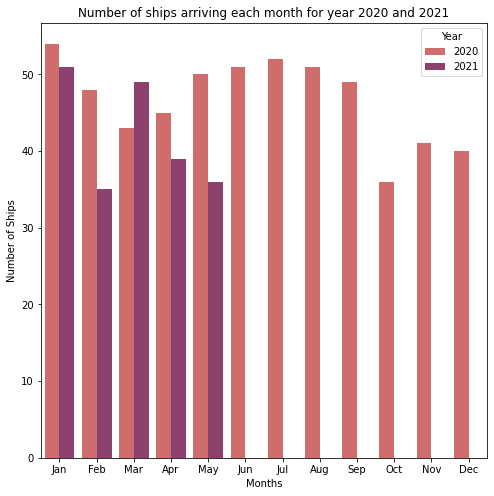

In [29]:
# Here we are calling the monthly_vessels function to look at the total number of vessels arriving for year 2020 and 2021
# The parameters in this function should not be changed

monthly_vessels_arriving(df_vessels)

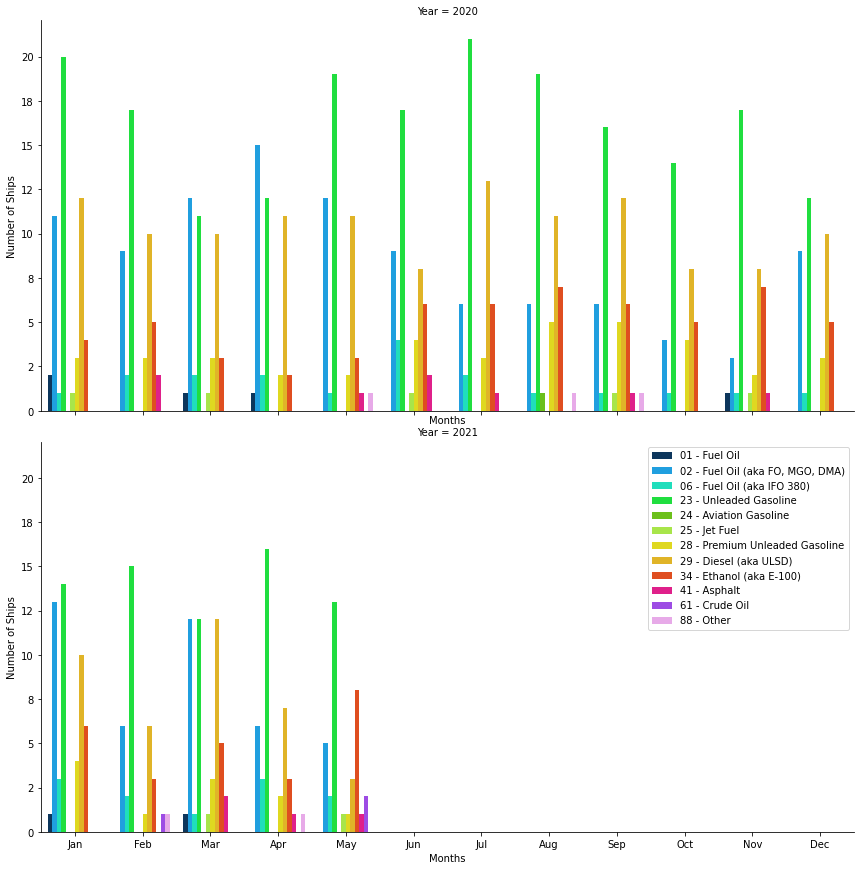

In [30]:
# Here we are calling the product_type function to look at the type of product/oil arriving every month for year 2020 and 2021
# The parameters in this function should not be changed

product_type(df_vessels)

# **CONVENIENCE FUNCTIONS** - can be changed by user to see visualizations for different months and year

### The below defined function are convenience functions and users can pass the desired parameters to see different visualizations based on different months and year.

In [31]:
# Function 4
def complaints_month_year(df,month,year):
  """
    The function is a convenient function which shows the number of complaints for specific month and year for all the days of the month
    Input- 1st parameter: df_stinky
         2nd parameter: the month for which the complaints are to be shown, the valid inputs will be ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
         3rd parameter: the year for which the complaints are to be shown, the valid input will be [2019,2020,2021]
         Data avalaible from: 2019['May'-'Dec'], 2020['Jan'-'Dec'], 2021['Jan'-'Jul']
    Return- A barplot with number of complaints for all the days of the specified month and year 
  """ 
  df=df.groupby(['Year','Month_name','Day'])['date'].count().sort_values(ascending=False).reset_index(name='Number of complaints')
  m=df[(df['Month_name']==month) & (df['Year']==year)]
  m=m.sort_values('Day')
  m['Number of complaints']=m['Number of complaints'].astype(int)
  if m.empty:
    print('\033[1m'+'Data not available for '+str(month)+str(year))
  else:
    fig, ax = plt.subplots(figsize=(8,6))
    g=sns.barplot(data=m,x='Day',y='Number of complaints',palette='cool')
    g.set_title('Number of user complaints for the month: '+str(month)+str(year))



# Function 5
def vessels_month_year(df,month,year):
  """
    The function is a convenient function which shows the number of vessels arriving for specific month and year for all the days of the month
    Input- 1st parameter: df_vessels
           2nd parameter: the month for which the arrival of vessels are to be shown, the valid inputs will be ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
           3rd parameter: the year for which the arrival of vessels are to be shown, the valid input will be [2020,2021]
           Data avalaible from: 2020['Jan'-'Dec'], 2021['Jan'-'May']
    Return- A barplot with number of vessels arriving for all the days of the specified month and year 
  """ 
  df=df.groupby(['Year','Month_name','Day','PRODUCT TYPE - OIL'])['ARRIVAL DATE'].count().sort_values(ascending=False).reset_index(name='Number of Vessels Arriving')
  v=df[(df['Month_name']==month) & (df['Year']==year)]
  v=v.sort_values('Day')
  if v.empty:
    print('\033[1m'+'Data not available for '+str(month)+str(year))
  else:
    dt=range(v['Number of Vessels Arriving'].max()+2)
    fig, ax = plt.subplots(figsize=(16,7))
    h=sns.barplot(data=v,x='Day',y='Number of Vessels Arriving',palette='gist_ncar',hue='PRODUCT TYPE - OIL')
    h.set_title('Number of oil vessels arriving for the month: '+str(month)+str(year))
    h.set_yticks(dt)
    plt.legend(loc=1, bbox_to_anchor=(1.23, 1))


# Function 6
def complaints_portland_southportland(df,month,year):
  """
    The function is a convenient function which shows the number of complaints coming from portland and south portland for specific month and year for all the days of the month
    Input- 1st parameter: df_stinky
           2nd parameter: the month for which the area-wise complaints are to be shown, the valid inputs will be ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
           3rd parameter: the year for which the area-wise complaints are to be shown, the valid input will be [2019,2020,2021]
           Data avalaible from: 2019['May'-'Dec'], 2020['Jan'-'Dec'], 2021['Jan'-'May']
    Return- A barplot with number of complaints coming from portland v/s complaints from south portland for all the days of the specified month and year 
  """ 
  df=df.groupby(['Year','Month_name','Day','South Portland/Portland'])['date'].count().sort_values(ascending=False).reset_index(name='Number of complaints')
  m=df[(df['Month_name']==month) & (df['Year']==year)]
  m=m.sort_values('Day')
  m['Number of complaints']=m['Number of complaints'].astype(int)
  if m.empty:
    print('\033[1m'+'Data not available for '+str(month)+str(year))
  else:
    g=sns.catplot(data=m,x='Day',y='Number of complaints',col='South Portland/Portland',palette='cool',kind='bar',height=8,aspect=0.9)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle('Number of complaints from Portland v/s South Portland for month: '+str(month)+str(year)) 


# Function 7
def temperature(df,month,year):
  """
    The function shows the average temperature for the specified month and year for all days
    Input-  1st parameter: df_weather
            2nd parameter: the month for which average temperature has to be shown, the valid inputs will be ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
            3rd parameter: the year for which the average temperature has to be shown, the valid inputs will be [2020,2021]
            Data available from: 2020['Sep'-'Dec'], 2021['Jan'-'Jul']
    Return- A lineplot showing the average temperature for specific month and year
  """
  r=df.groupby(['Year','Month_name','Day'])['Temp Avg'].mean().reset_index()
  r=df[(df['Month_name']==month) & (df['Year']==year)]
  r=r.sort_values('Day')
  if r.empty:
    print('\033[1m'+'Data not available for '+str(month)+str(year))
  else: 
    fig, ax = plt.subplots(figsize=(8,6))
    k=sns.lineplot(data=r,x='Day',y='Temp Avg',palette='coolwarm')
    k.set_title('Average temperature for the month: '+str(month)+str(year))


# Function 8
def wind_speed(df,month,year):
  """
    The function shows the average wind speed for the specified month and year for all days
    Input-  1st parameter: df_weather
            2nd parameter: the month for which average wind speed has to be shown, the valid inputs will be ['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
            3rd parameter: the year for which the average wind speed has to be shown, the valid inputs will be [2020,2021]
            Data available from: 2020['Sep'-'Dec'], 2021['Jan'-'Jul']
    Return- A lineplot showing the average wind speed for specific month and year
  """
  r=df.groupby(['Year','Month_name','Day'])['Windspeed'].mean().reset_index()
  r=df[(df['Month_name']==month) & (df['Year']==year)]
  r=r.sort_values('Day')
  if r.empty:
    print('\033[1m'+'Data not available for '+str(month)+str(year))
  else:
    fig, ax = plt.subplots(figsize=(8,6))
    k=sns.lineplot(data=r,x='Day',y='Windspeed',palette='autumn',markers=['o'])
    k.set_title('Average Windspeed for the month: '+str(month)+str(year))

# **Running Convenience Functions**

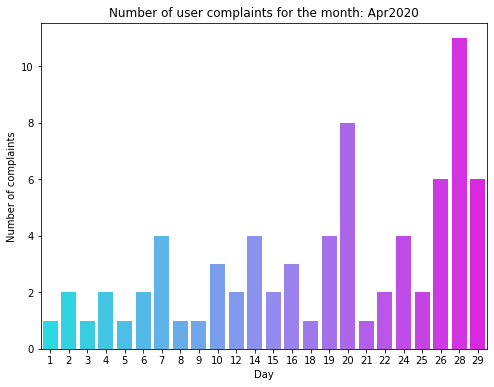

In [32]:
# Here we are calling the complaints_month_year function to look at the number of complaints for month 'Nov' and year 2020
# Parameters here can be changed

complaints_month_year(df_stinky,'Apr',2020)

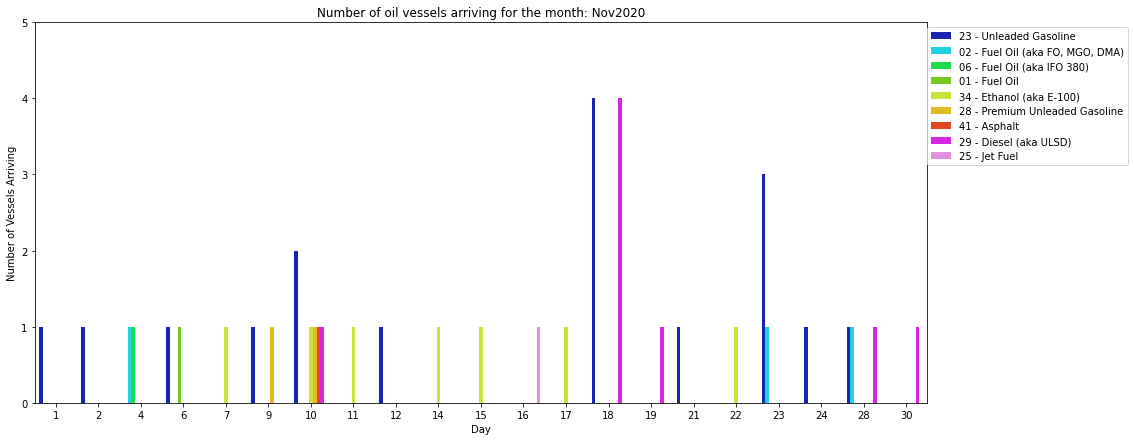

In [33]:
# Here we are calling the vessels_month_year function to look at the number of vessels arriving with their product type for month 'Nov' and year 2020
# Parameters here can be changed

vessels_month_year(df_vessels,'Nov',2020)


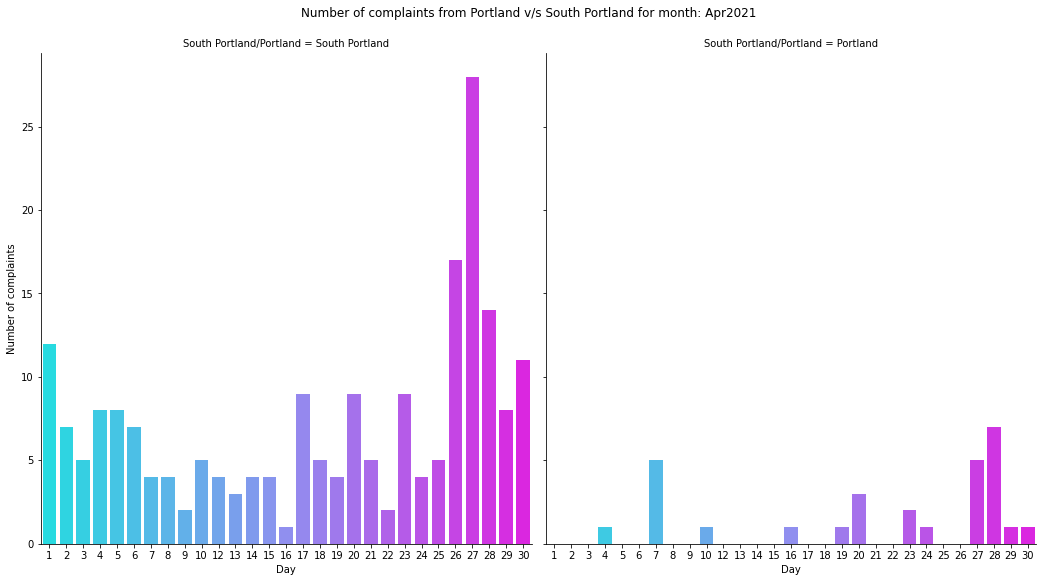

In [34]:
# Here we are calling the complaints_portland_southportland function to look at the number of complaints coming from portland v/s south portland for month 'Apr' and year 2021
# Parameters here can be changed

complaints_portland_southportland(df_stinky,'Apr',2021)

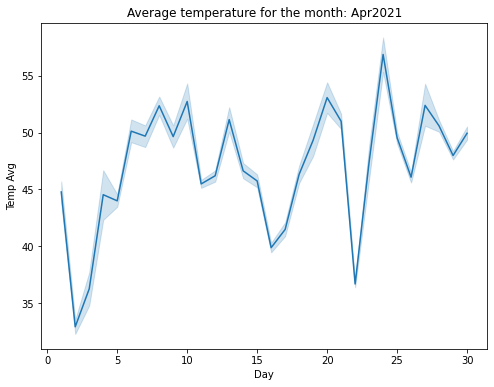

In [35]:
# Here we are calling the temperature function to look at the average temperature for month 'Apr' and year 2021
# Parameters here can be changed

temperature(df_weather,'Apr',2021)

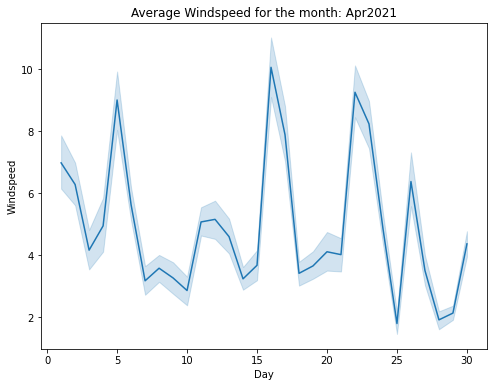

In [36]:
# Here we are calling the wind_speed function to look at the average temperature for month 'Apr' and year 2021
wind_speed(df_weather,'Apr',2021)